In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [100]:
def sample_means(population_dist, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = population_dist(size=sample_size)
        means.append(np.mean(sample))
    return np.array(means)

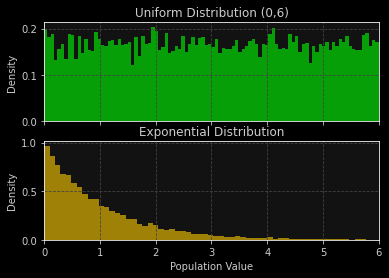

In [186]:
# Uniform and Exponential distributions 
uniform = np.random.uniform(0,6, size=10000)
exp = np.random.exponential(size=10000)
bins = int(np.sqrt(10000))

plt.style.use('dark_background')

# Create figure with two subplots (upper and lower)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # sharex ensures both histograms use the same x-axis
fig.patch.set_facecolor('#000000')  # Pure black background

# Plot the uniform distribution in the upper plot
ax1.set_facecolor('#121212')  # Dark gray background
ax1.hist(uniform, bins=bins, alpha=0.6, color='#00ff00', density=True)
ax1.grid(True, color='#444444', linestyle='--')
ax1.tick_params(axis='x', colors='#cccccc')
ax1.tick_params(axis='y', colors='#cccccc')
ax1.set_ylabel("Density", color='#cccccc')
ax1.set_title("Uniform Distribution (0,6)",color='#cccccc')

# Plot the exponential distribution in the lower plot
ax2.set_facecolor('#121212')  # Dark gray background
ax2.hist(exp, bins=bins, alpha=0.6, color='#ffcc00', density=True)
ax2.grid(True, color='#444444', linestyle='--')
ax2.tick_params(axis='x', colors='#cccccc')
ax2.tick_params(axis='y', colors='#cccccc')
ax2.set_xlabel("Population Value", color='#cccccc')
ax2.set_ylabel("Density", color='#cccccc')
ax2.set_title("Exponential Distribution",color='#cccccc')
ax2.set_xticks([i for i in range(0,7)])
ax2.set_xlim(0,6)

# Show plot
# plt.tight_layout()
plt.show()

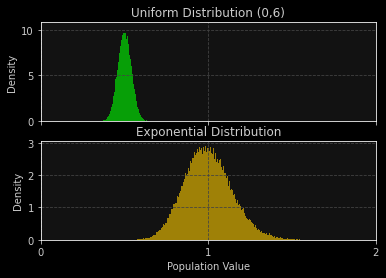

In [188]:

# Uniform and Exponential distributions
uniform_means = sample_means(np.random.uniform, sample_size=50, num_samples=100000)
exp_means = sample_means(np.random.exponential, sample_size=50, num_samples=100000)
bins = int(np.sqrt(100000))

plt.style.use('dark_background')

# Create figure with two subplots (upper and lower)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # sharex ensures both histograms use the same x-axis
fig.patch.set_facecolor('#000000')  # Pure black background

# Plot the uniform distribution in the upper plot
ax1.set_facecolor('#121212')  # Dark gray background
ax1.hist(uniform_means, bins=bins, alpha=0.6, color='#00ff00',density=True)
ax1.grid(True, color='#444444', linestyle='--')
ax1.tick_params(axis='x', colors='#cccccc')
ax1.tick_params(axis='y', colors='#cccccc')
ax1.set_ylabel("Density", color='#cccccc')
ax1.set_title("Uniform Distribution (0,6)",color='#cccccc')

# Plot the exponential distribution in the lower plot
ax2.set_facecolor('#121212')  # Dark gray background
ax2.hist(exp_means, bins=bins, alpha=0.6, color='#ffcc00',density=True)
ax2.grid(True, color='#444444', linestyle='--')
ax2.tick_params(axis='x', colors='#cccccc')
ax2.tick_params(axis='y', colors='#cccccc')
ax2.set_xlabel("Population Value", color='#cccccc')
ax2.set_ylabel("Density", color='#cccccc')
ax2.set_title("Exponential Distribution",color='#cccccc')
ax2.set_xticks([i for i in range(0,7)])
ax2.set_xlim(0,2)

# Show plot
# plt.tight_layout()
plt.show()

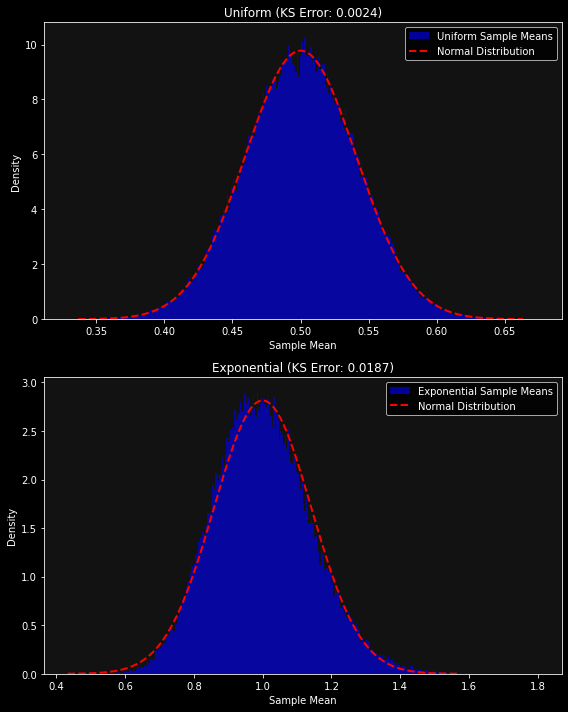

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to plot histogram and normal comparison
def plot_distribution_and_error(dist_name, sample_means, ax):
    # Plot the histogram
    ax.hist(sample_means, bins=int(np.sqrt(sample_means.size)) , density=True, alpha=0.6, color='blue', label=f'{dist_name} Sample Means')
    
    # Overlay a normal distribution with the same mean and std
    mean = np.mean(sample_means)
    std = np.std(sample_means)
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    normal_curve = stats.norm.pdf(x, mean, std)
    ax.plot(x, normal_curve, 'r--', label='Normal Distribution', linewidth=2)

    # Calculate and display error using KS test
    ks_stat, p_value = stats.kstest((sample_means - mean) / std, 'norm')
    ax.set_title(f'{dist_name} (KS Error: {ks_stat:.4f})')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.legend()

# Create subplots to compare distributions and errors
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
fig.patch.set_facecolor('#000000')  # Pure black background
axs[0].set_facecolor('#121212')  # Dark gray background
axs[1].set_facecolor('#121212')

# Plot both distributions and their error with respect to a normal distribution
plot_distribution_and_error('Uniform', uniform_means, axs[0])
plot_distribution_and_error('Exponential', exp_means, axs[1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()